In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict, cross_val_score

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold

from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression


In [99]:
mappings = pd.read_csv('IDs_mapping.csv')
df = pd.read_csv('diabetic_data.csv')

df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [100]:
df = df.replace('?',np.NaN)
print(df.isnull().sum())
print('\n')

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [101]:
print(df.isnull().sum() / len(df) * 100)
print('\n')

encounter_id                 0.000000
patient_nbr                  0.000000
race                         2.233555
gender                       0.000000
age                          0.000000
weight                      96.858479
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                  39.557416
medical_specialty           49.082208
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.020636
diag_2                       0.351787
diag_3                       1.398306
number_diagnoses             0.000000
max_glu_serum                0.000000
A1Cresult                    0.000000
metformin                    0.000000
repaglinide                  0.000000
nateglinide 

In [102]:
df = df.drop(['weight','payer_code','medical_specialty'],axis=1)
print(df.isnull().sum() / len(df) * 100)
print('\n')

encounter_id                0.000000
patient_nbr                 0.000000
race                        2.233555
gender                      0.000000
age                         0.000000
admission_type_id           0.000000
discharge_disposition_id    0.000000
admission_source_id         0.000000
time_in_hospital            0.000000
num_lab_procedures          0.000000
num_procedures              0.000000
num_medications             0.000000
number_outpatient           0.000000
number_emergency            0.000000
number_inpatient            0.000000
diag_1                      0.020636
diag_2                      0.351787
diag_3                      1.398306
number_diagnoses            0.000000
max_glu_serum               0.000000
A1Cresult                   0.000000
metformin                   0.000000
repaglinide                 0.000000
nateglinide                 0.000000
chlorpropamide              0.000000
glimepiride                 0.000000
acetohexamide               0.000000
g

In [103]:
raceEncoded = pd.get_dummies(df['race'])
genderEncoded = pd.get_dummies(df['gender'])
maxGluEncoded = pd.get_dummies(df['max_glu_serum'])
dfEncoded = df.drop(['race','gender','max_glu_serum'],axis=1)
dfEncoded = dfEncoded.join(raceEncoded)
dfEncoded = dfEncoded.join(genderEncoded)
dfEncoded = dfEncoded.join(maxGluEncoded)

In [ ]:
varToChange = ['A1Cresult','metformin','repaglinide','nateglinide','chlorpropamide',
               'glimepiride','acetohexamide','glipizide','glyburide','tolbutamide',
               'pioglitazone','acarbose','miglitol','troglitazone','tolazamide',
               'examide','citoglipton','insulin','glyburide-metformin','glimepiride-pioglitazone',
               'metformin-rosiglitazone','metformin-pioglitazone']
for i in varToChange:
    print(i)
    for j in dfEncoded[i].unique():
        print(j)
    print('==============')

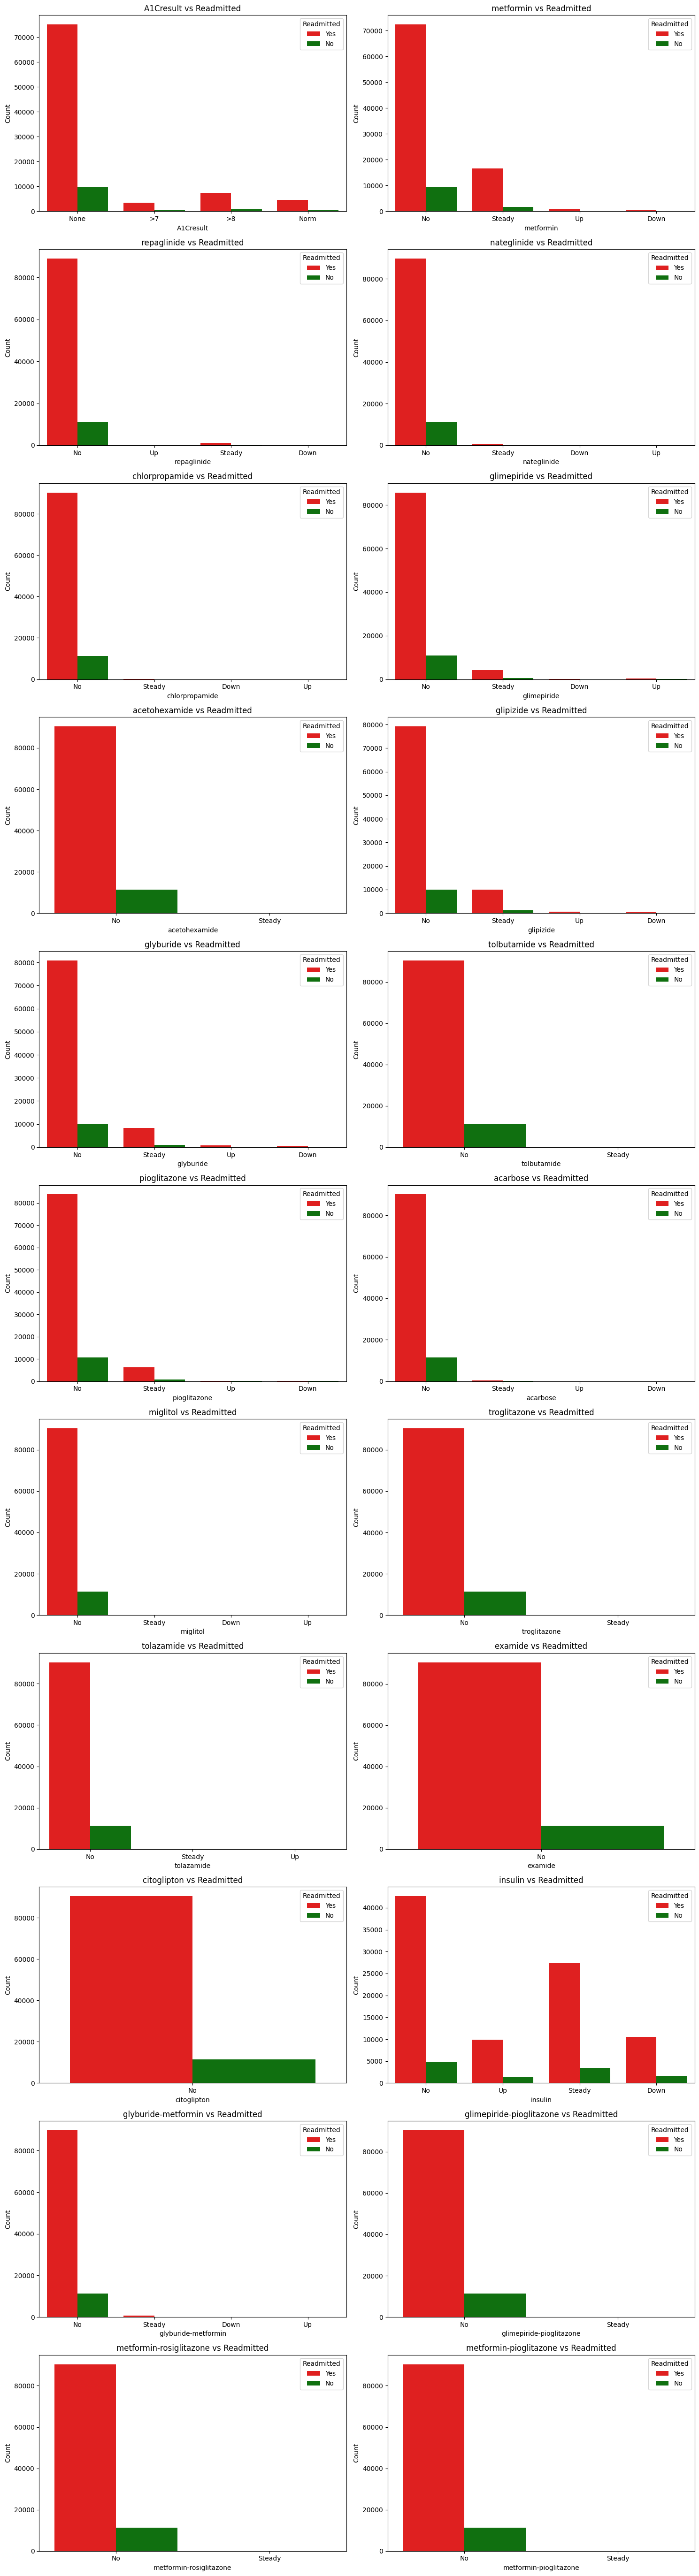

In [109]:
# the code looks like it makes sense byut the plots look flipped

df['readmitted_group'] = df['readmitted'].apply(lambda x: 'Yes' if x == '<30' else 'No')

num_rows = len(varToChange) // 2 + len(varToChange) % 2
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize = (15, 5 * num_rows))
axes = axes.flatten()

for i, column in enumerate(varToChange):
    ax = axes[i]

    sns.countplot(x=column,
                  data = df,
                  hue = 'readmitted_group',
                  ax = ax,
                  palette = {'Yes': 'green', 'No': 'red'})
    ax.set_title(f'{column} vs Readmitted')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.legend(title = 'Readmitted', labels = ['Yes', 'No'])

if len(varToChange) % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

# Remove the 'readmitted_group' column from the DataFrame
df.drop('readmitted_group', axis = 1, inplace = True)


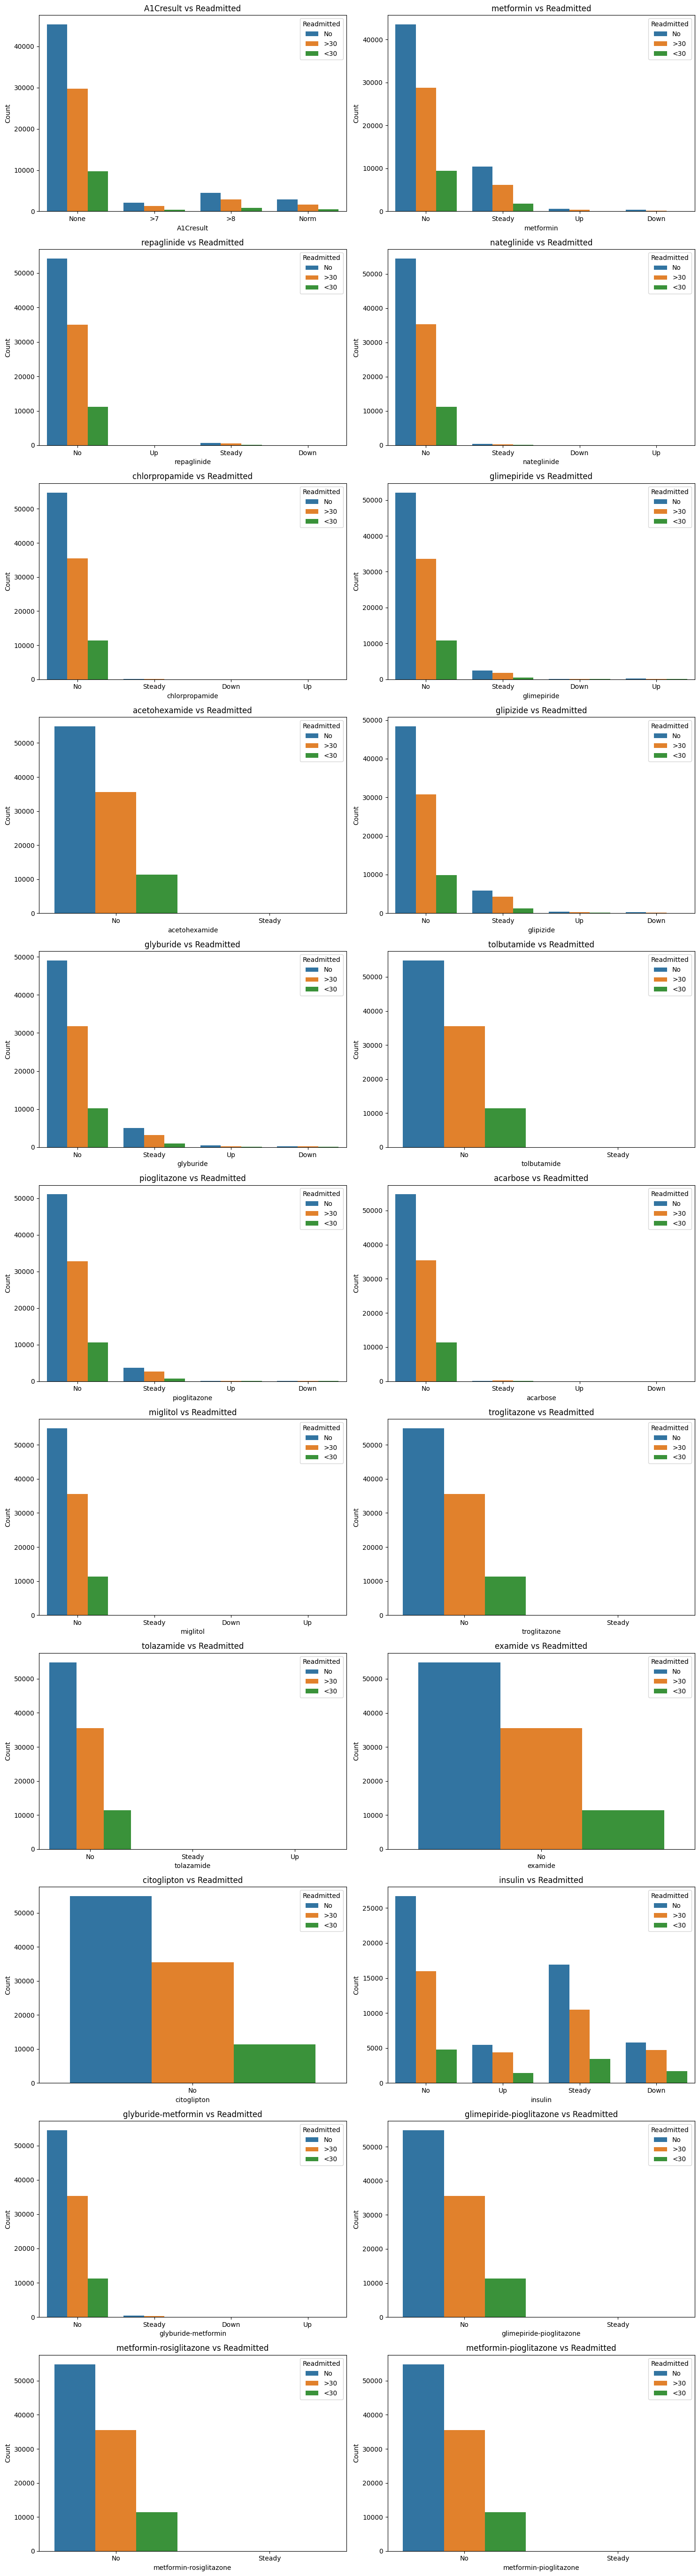

In [110]:
# this looks good but maybe double check the numbers due to the above plots

num_rows = len(varToChange) // 2 + len(varToChange) % 2
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize = (15, 5 * num_rows))
axes = axes.flatten()

for i, column in enumerate(varToChange):
    ax = axes[i]

    sns.countplot(x = column,
                  data = df,
                  hue = 'readmitted',
                  ax = ax)

    ax.set_title(f'{column} vs Readmitted')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.legend(title = 'Readmitted', labels = ['No', '>30', '<30'])

if len(varToChange) % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


In [12]:
dfEncoded.loc[dfEncoded['change'] == 'Ch', 'change'] = 1
dfEncoded.loc[dfEncoded['change'] == 'No', 'change'] = 0
dfEncoded.loc[dfEncoded['diabetesMed'] == 'No', 'diabetesMed'] = 0
dfEncoded.loc[dfEncoded['diabetesMed'] == 'Yes', 'diabetesMed'] = 1

In [13]:
dfEncoded.loc[dfEncoded['age'] == '[0-10)', 'age'] = 5
dfEncoded.loc[dfEncoded['age'] == '[10-20)', 'age'] = 15
dfEncoded.loc[dfEncoded['age'] == '[20-30)', 'age'] = 25
dfEncoded.loc[dfEncoded['age'] == '[30-40)', 'age'] = 35
dfEncoded.loc[dfEncoded['age'] == '[40-50)', 'age'] = 45
dfEncoded.loc[dfEncoded['age'] == '[50-60)', 'age'] = 55
dfEncoded.loc[dfEncoded['age'] == '[60-70)', 'age'] = 65
dfEncoded.loc[dfEncoded['age'] == '[70-80)', 'age'] = 75
dfEncoded.loc[dfEncoded['age'] == '[80-90)', 'age'] = 85
dfEncoded.loc[dfEncoded['age'] == '[90-100)', 'age'] = 95

In [14]:
dfEncoded['diag_1'] = dfEncoded['diag_1'].astype(str)
for i in dfEncoded['diag_1'].unique():
    if i[0] == 'V' or i[0] == 'E':
        dfEncoded.loc[dfEncoded['diag_1'] == i, 'diag_1'] = i[1:]
dfEncoded['diag_1'] = dfEncoded['diag_1'].astype(float)


In [15]:
dfEncoded['diag_2'] = dfEncoded['diag_2'].astype(str)
for i in dfEncoded['diag_2'].unique():
    if i[0] == 'V' or i[0] == 'E':
        dfEncoded.loc[dfEncoded['diag_2'] == i, 'diag_2'] = i[1:]
dfEncoded['diag_2'] = dfEncoded['diag_2'].astype(float)


In [16]:
dfEncoded['diag_3'] = dfEncoded['diag_3'].astype(str)
for i in dfEncoded['diag_3'].unique():
    if i[0] == 'V' or i[0] == 'E':
        dfEncoded.loc[dfEncoded['diag_3'] == i, 'diag_3'] = i[1:]
dfEncoded['diag_3'] = dfEncoded['diag_3'].astype(float)

In [17]:
X = dfEncoded.drop(['readmitted'],axis=1)
y = dfEncoded['readmitted']
print(X.shape)
print(y.shape)

(101766, 55)
(101766,)


In [49]:
X.head()

,encounter_id,patient_nbr,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,Caucasian,Hispanic,Other,Female,Male,Unknown/Invalid,>200,>300,None,Norm
0,2278392,8222157,5,6,25,1,1,41,0,1,...,1,0,0,1,0,0,0,0,1,0
1,149190,55629189,15,1,1,7,3,59,0,18,...,1,0,0,1,0,0,0,0,1,0
2,64410,86047875,25,1,1,7,2,11,5,13,...,0,0,0,1,0,0,0,0,1,0
3,500364,82442376,35,1,1,7,2,44,1,16,...,1,0,0,0,1,0,0,0,1,0
4,16680,42519267,45,1,1,7,1,51,0,8,...,1,0,0,0,1,0,0,0,1,0


In [33]:
y.unique()



array(['NO', '>30', '<30'], dtype=object)

In [35]:
def map_to_binary(value):
    if value == '<30':
        return 1
    else:
        return 0

y = y.apply(map_to_binary)
y.unique()

array([0, 1])

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
model = LogisticRegression()


In [ ]:
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=5)
print("Cross-Validation Scores:", scores)


In [ ]:
model.fit(X_train, y_train)

test_accuracy = model.score(X_test, y_test)
print("Test Set Accuracy:", test_accuracy)

In [23]:
X_train.dtypes

encounter_id                  int64
patient_nbr                   int64
age                          object
admission_type_id             int64
discharge_disposition_id      int64
admission_source_id           int64
time_in_hospital              int64
num_lab_procedures            int64
num_procedures                int64
num_medications               int64
number_outpatient             int64
number_emergency              int64
number_inpatient              int64
diag_1                      float64
diag_2                      float64
diag_3                      float64
number_diagnoses              int64
A1Cresult                    object
metformin                    object
repaglinide                  object
nateglinide                  object
chlorpropamide               object
glimepiride                  object
acetohexamide                object
glipizide                    object
glyburide                    object
tolbutamide                  object
pioglitazone                